### Permutasjonstest - Introduksjon

Permutasjonstesten er en ikke-parametrisk statistisk metode som brukes for å teste hypoteser om forskjeller mellom to eller flere grupper ved å rearrangere dataene og observere hvor ekstreme de observerte statistikkene er sammenlignet med rearrangerte data. Denne testen krever ikke antagelser om fordelingen av dataene, noe som gjør den svært nyttig i mange situasjoner.


In [1]:
# Importerer nødvendige biblioteker
import numpy as np

# Genererer datasett for to grupper
np.random.seed(0)  # For reproduserbarhet
group1 = np.random.normal(loc=1.0, scale=1.0, size=20)  # Gruppe 1
group2 = np.random.normal(loc=1.5, scale=1.0, size=20)  # Gruppe 2


### Visualisering av data

Før vi utfører permutasjonstesten, la oss visualisere datasettene for å få et overblikk over gruppene.


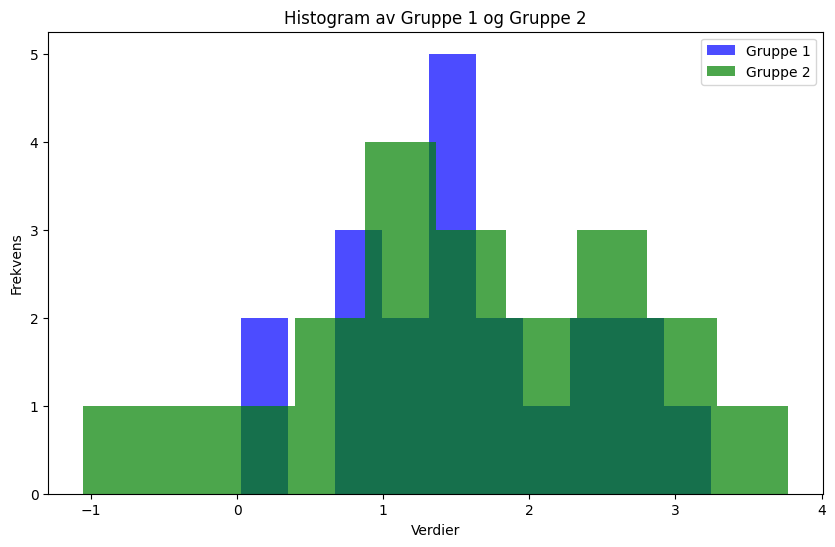

In [2]:
# Importerer nødvendige biblioteker for visualisering
import matplotlib.pyplot as plt

# Plotter dataene
plt.figure(figsize=(10, 6))
plt.hist(group1, bins=10, alpha=0.7, color='blue', label='Gruppe 1')
plt.hist(group2, bins=10, alpha=0.7, color='green', label='Gruppe 2')
plt.xlabel('Verdier')
plt.ylabel('Frekvens')
plt.title('Histogram av Gruppe 1 og Gruppe 2')
plt.legend()
plt.show()


### Utføring av permutasjonstest

Permutasjonstesten vurderer om den observerte forskjellen i gjennomsnitt mellom to grupper kunne ha oppstått tilfeldig. Vi kombinerer dataene, shuffler dem og deler dem i nye grupper flere ganger for å se hvor ofte vi observerer en like stor eller større forskjell i gjennomsnitt.


In [3]:
# Definerer permutasjonstestfunksjonen
def permutation_test(x, y, num_permutations=10000):
    obs_diff = np.mean(x) - np.mean(y)
    combined = np.concatenate([x, y])
    
    count = 0
    for _ in range(num_permutations):
        permuted = np.random.permutation(combined)
        new_x = permuted[:len(x)]
        new_y = permuted[len(x):]
        perm_diff = np.mean(new_x) - np.mean(new_y)
        if perm_diff >= obs_diff:
            count += 1
            
    p_value = count / num_permutations
    return obs_diff, p_value

# Utfører permutasjonstesten
obs_diff, p_value = permutation_test(group1, group2)
obs_diff, p_value


(0.013584239458921843, 0.4893)

### Konklusjon

Resultatet fra permutasjonstesten gir oss en p-verdi, som representerer sannsynligheten for å observere en like stor eller større forskjell i gjennomsnitt mellom gruppene gitt at nullhypotesen er sann. En lav p-verdi indikerer at forskjellen i gjennomsnitt sannsynligvis ikke skyldes tilfeldighet, og vi kan vurdere å forkaste nullhypotesen.
